In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

np.int64(2310)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


Transforming average_rain_fall_mm_per_year

In [ ]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485
1,1485
2,1485
3,1485
4,1485
...,...
28237,657
28238,657
28239,657
28240,657


In [ ]:
def isstr(obj):
  try:
    float(obj)
    return False
  except:
    return True

In [ ]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isstr)].index

In [ ]:
df=df.drop(to_drop)

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


Graph Frequency vs Area

<Axes: xlabel='count', ylabel='Area'>

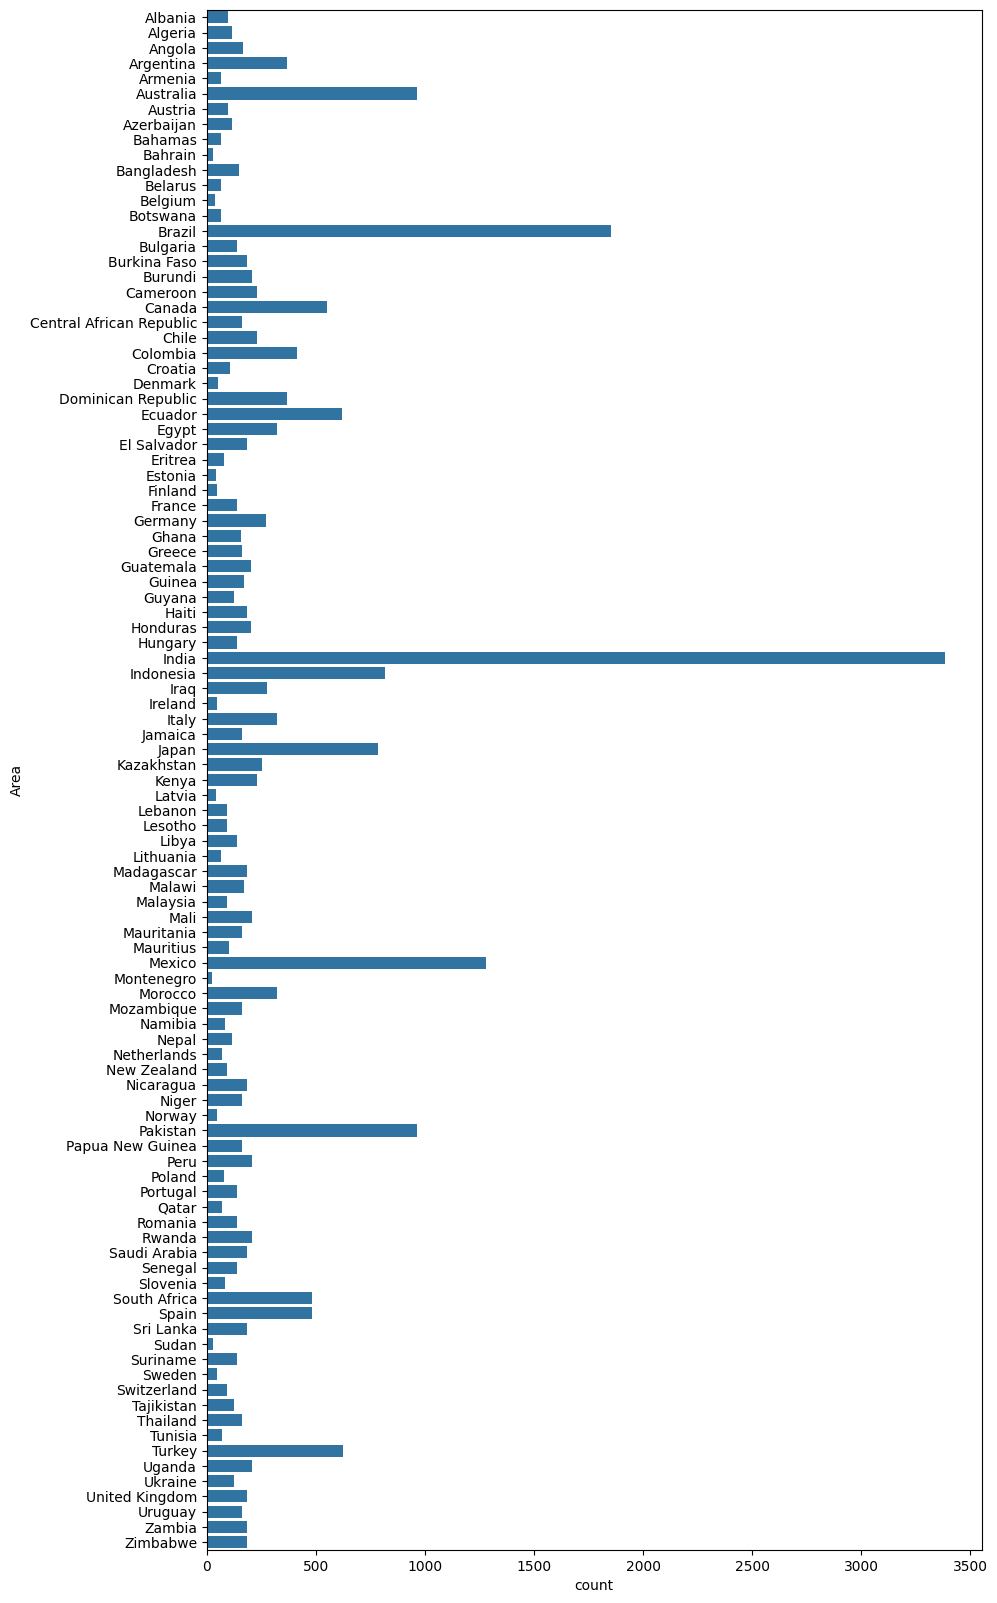

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

Yield per country

In [ ]:
len(df['Area'])

25932

In [ ]:
country=(df['Area'].unique())

In [ ]:
yield_per_country=[]
for state in country:
  yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [ ]:
df['hg/ha_yield']

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
...,...
28237,22581
28238,3066
28239,13142
28240,22222


Yield Per Country Graph

<Axes: >

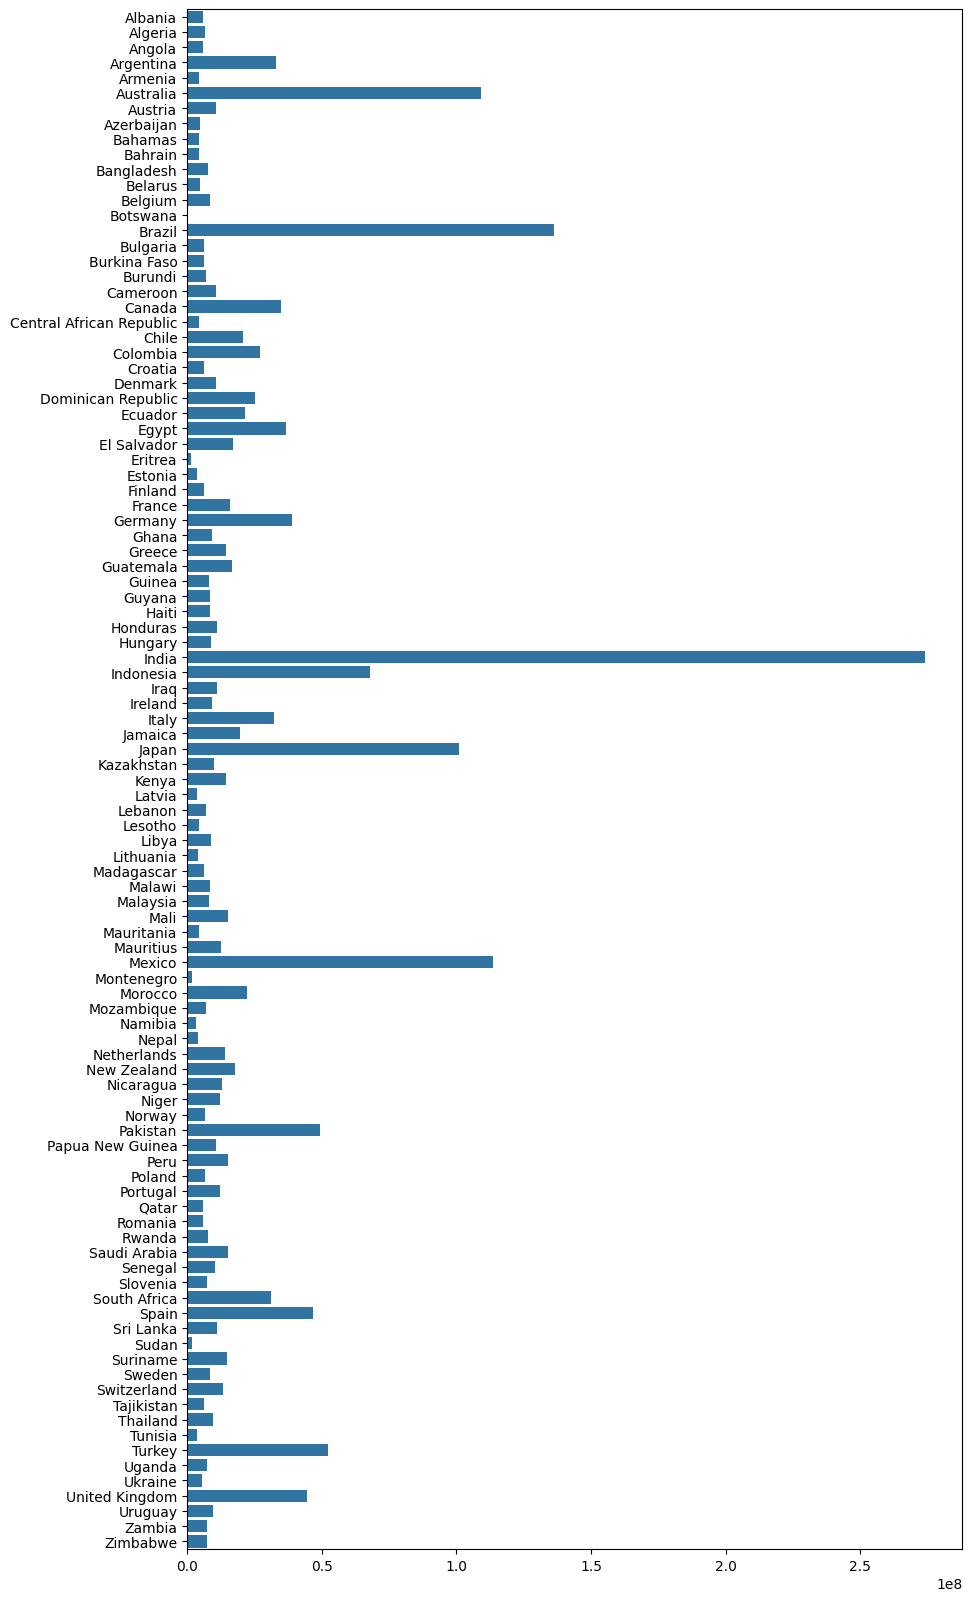

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country)

In [ ]:
df['Item'].value_counts()

,count
Item,
Potatoes,3956
Maize,3824
Wheat,3539
"Rice, paddy",3091
Soybeans,2940
Sorghum,2770
Sweet potatoes,2593
Cassava,1889
Yams,774


<Axes: xlabel='count', ylabel='Item'>

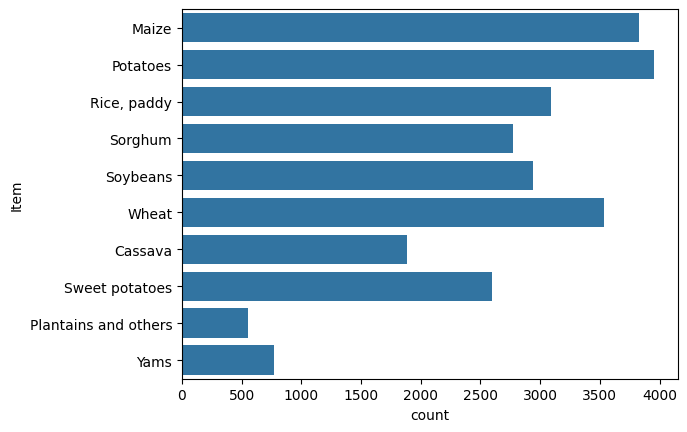

In [ ]:
sns.countplot(y=df['Item'])

Yield Vs Item

In [ ]:
crops=(df['Item'].unique())

In [ ]:
yield_per_crop=[]
for crop in crops:
  yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

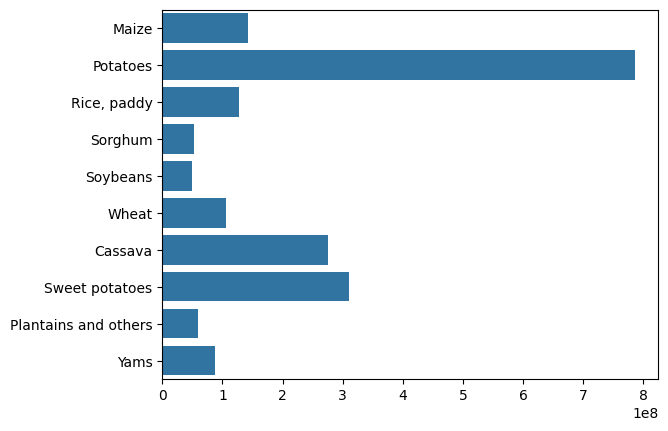

In [ ]:
sns.barplot(y=crops,x=yield_per_crop)

Train Test split Rearranging Columns

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [ ]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [ ]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.00,16.37,Albania,Maize,36613
1,1990,1485,121.00,16.37,Albania,Potatoes,66667
2,1990,1485,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.00,16.37,Albania,Sorghum,12500
4,1990,1485,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [ ]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(20745, 6)

In [ ]:
x_test.shape

(5187, 6)

In [ ]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240,98328.63,27.51,Colombia,Maize
28212,2010,657,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537,36572.75,7.85,Canada,Wheat
860,1991,534,17866.00,18.73,Australia,Potatoes
17223,1998,250,6416.14,6.94,Kazakhstan,Potatoes


Converting Categorical to Numerical and Scaling the values

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ohe=OneHotEncoder(drop='first')
scalar=StandardScaler()

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[4,5]),
        ('standarization',scalar,[0,1,2,3])
    ],
    remainder='passthrough'
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standarization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [ ]:
x_train_dummy=preprocessor.fit_transform(x_train)
x_test_dummy=preprocessor.fit_transform(x_test)

In [ ]:
x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

Training Models

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
models={
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'Knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
  }

for name,mod in models.items():
  mod.fit(x_train_dummy,y_train)
  y_pred=mod.predict(x_test_dummy)

  print(f"{name} MSE:{ mean_squared_error(y_test,y_pred)} Score{r2_score(y_test,y_pred)}")

lr MSE:1821769514.326142 Score0.7486483304073466


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE:1822352597.4122243 Score0.7485678817523188
rg MSE:1822645759.8596852 Score0.7485274337867273
Knr MSE:124881646.97772121 Score0.9827699331762387
dtr MSE:475281099.50472337 Score0.9344249110840278


Select model

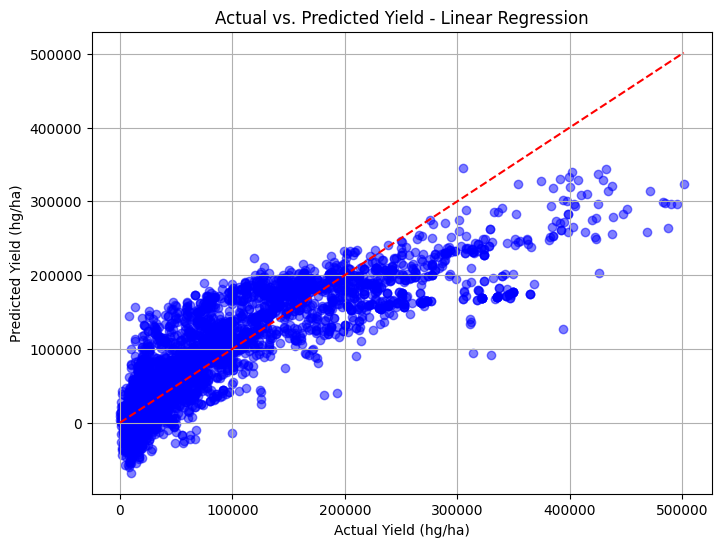

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_dummy, y_train)
y_pred_lr = lr.predict(x_test_dummy)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title("Actual vs. Predicted Yield - Linear Regression")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


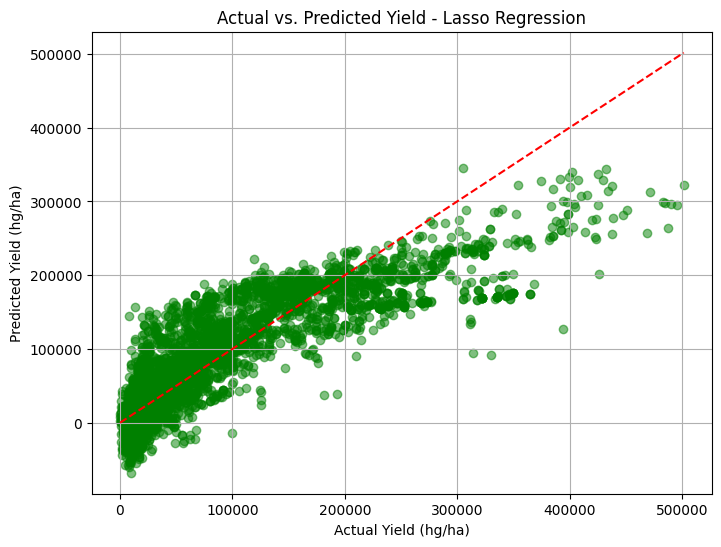

In [ ]:
from sklearn.linear_model import Lasso

lss = Lasso()
lss.fit(x_train_dummy, y_train)
y_pred_lss = lss.predict(x_test_dummy)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lss, color='green', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title("Actual vs. Predicted Yield - Lasso Regression")
plt.grid(True)
plt.show()

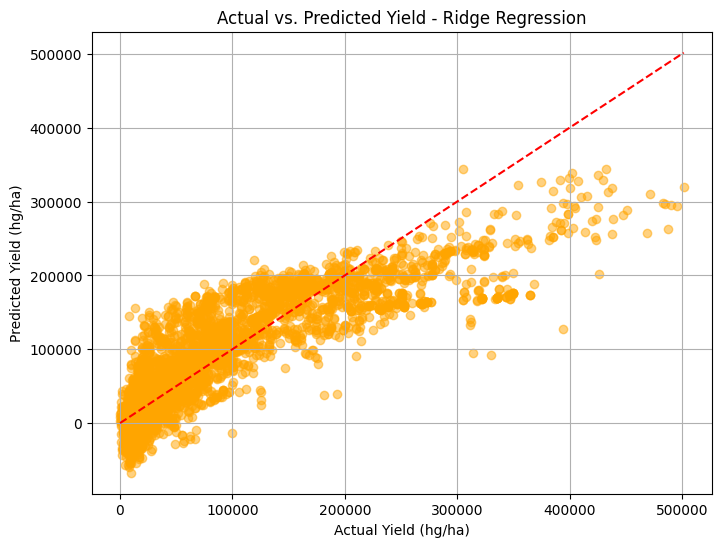

In [ ]:
from sklearn.linear_model import Ridge

rg = Ridge()
rg.fit(x_train_dummy, y_train)
y_pred_rg = rg.predict(x_test_dummy)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rg, color='orange', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title("Actual vs. Predicted Yield - Ridge Regression")
plt.grid(True)
plt.show()



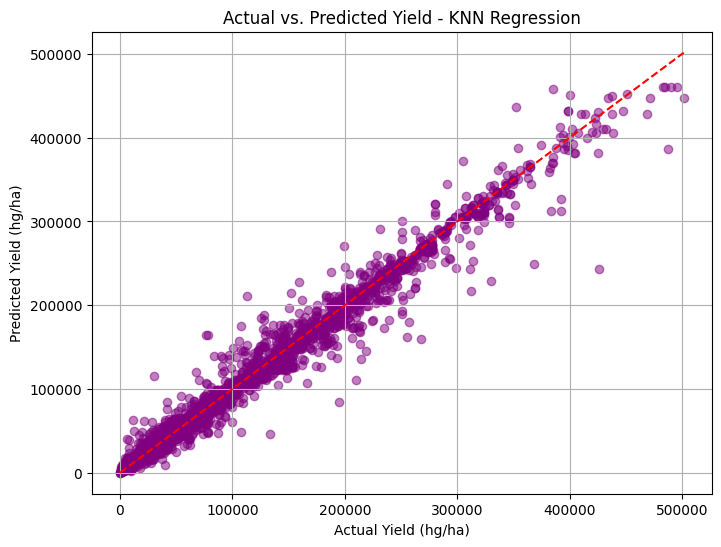

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Knr = KNeighborsRegressor()  # You can adjust the 'n_neighbors' parameter if needed
Knr.fit(x_train_dummy, y_train)
y_pred_Knr = Knr.predict(x_test_dummy)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Knr, color='purple', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title("Actual vs. Predicted Yield - KNN Regression")
plt.grid(True)
plt.show()


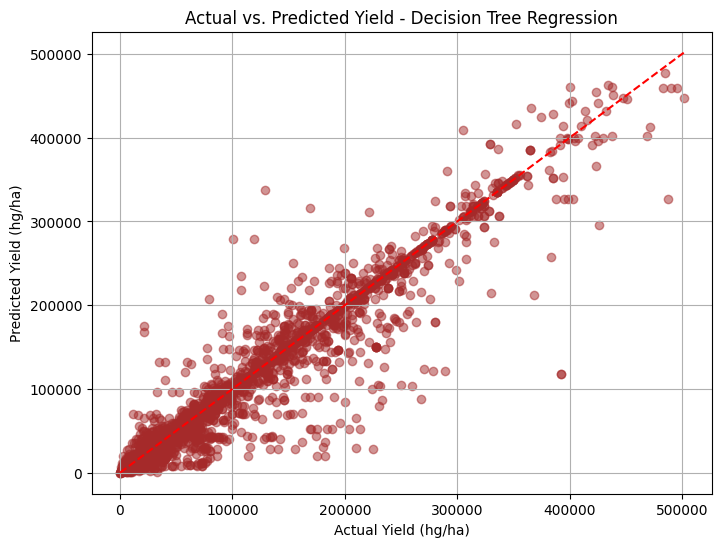

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()  # You can adjust parameters like 'max_depth' if needed
dtr.fit(x_train_dummy, y_train)
y_pred_dtr = dtr.predict(x_test_dummy)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dtr, color='brown', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title("Actual vs. Predicted Yield - Decision Tree Regression")
plt.grid(True)
plt.show()


Predictive System

K NEAREST NEIGHBORS

In [ ]:
def prediction(Year	,average_rain_fall_mm_per_year	,pesticides_tonnes	,avg_temp,	Area	,Item):
  features=np.array([[Year	,average_rain_fall_mm_per_year	,pesticides_tonnes	,avg_temp,	Area	,Item]])
  transformed_features=preprocessor.transform(features)
  predicted_value=Knr.predict(transformed_features).reshape(1,-1)
  return predicted_value[0]


In [ ]:
Year=2000
average_rain_fall_mm_per_year=59.0
pesticides_tonnes=3024.11
avg_temp	=26.55
Area="Saudi Arabia"
Item="Sorghum"

result=prediction(Year	,average_rain_fall_mm_per_year	,pesticides_tonnes	,avg_temp,	Area	,Item)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
result

array([12529.])

ACCURACY COMPARISON

In [ ]:
model_scores = {
    'Linear Regression': r2_score(y_test, y_pred_lr),
    'Lasso': r2_score(y_test, y_pred_lss),
    'Ridge': r2_score(y_test, y_pred_rg),
    'KNN': r2_score(y_test, y_pred_Knr),
    'Decision Tree': r2_score(y_test, y_pred_dtr)
}

# Or using a list:
model_scores = [
    r2_score(y_test, y_pred_lr),  # Linear Regression
    r2_score(y_test, y_pred_lss),  # Lasso
    r2_score(y_test, y_pred_rg),  # Ridge
    r2_score(y_test, y_pred_Knr),  # KNN
    r2_score(y_test, y_pred_dtr)   # Decision Tree
]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree']

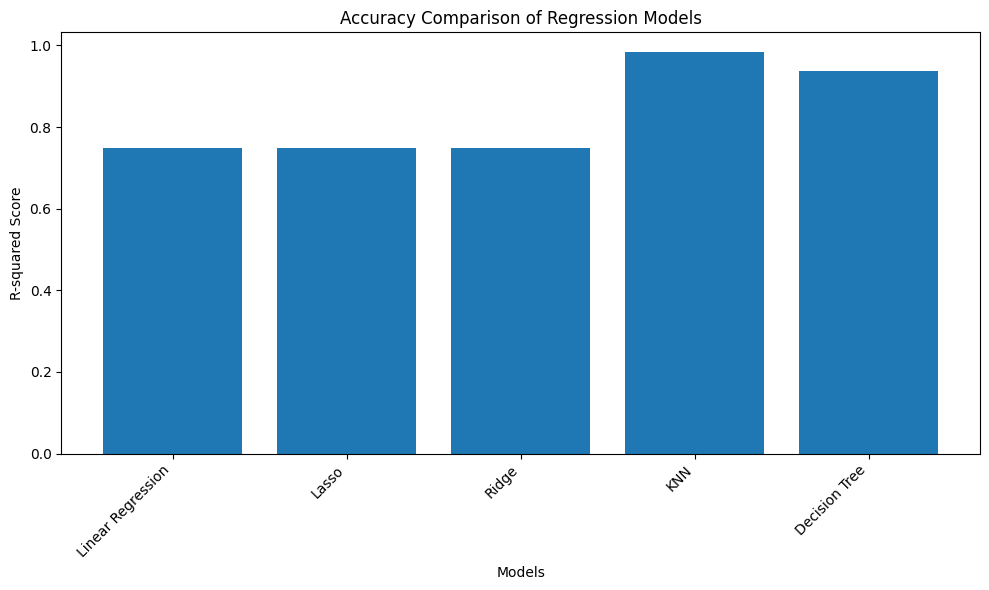

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using matplotlib:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores)
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Accuracy Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score

In [ ]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'Knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(x_train_dummy, y_train)
    y_pred = mod.predict(x_test_dummy)

    # Calculate accuracy for regression models using R-squared
    score = r2_score(y_test, y_pred)
    accuracy_percentage = score * 100  # Convert to percentage

    print(f"{name} R-squared: {score:.4f} Accuracy Percentage: {accuracy_percentage:.2f}%")

lr R-squared: 0.7486 Accuracy Percentage: 74.86%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss R-squared: 0.7486 Accuracy Percentage: 74.86%
rg R-squared: 0.7485 Accuracy Percentage: 74.85%
Knr R-squared: 0.9828 Accuracy Percentage: 98.28%
dtr R-squared: 0.9345 Accuracy Percentage: 93.45%


Linear Regression - MSE: 1821769514.3261, R-squared: 0.7486
Lasso - MSE: 1822352597.4122, R-squared: 0.7486
Ridge - MSE: 1822645759.8597, R-squared: 0.7485
KNN - MSE: 124881646.9777, R-squared: 0.9828
Decision Tree - MSE: 454126527.1033, R-squared: 0.9373


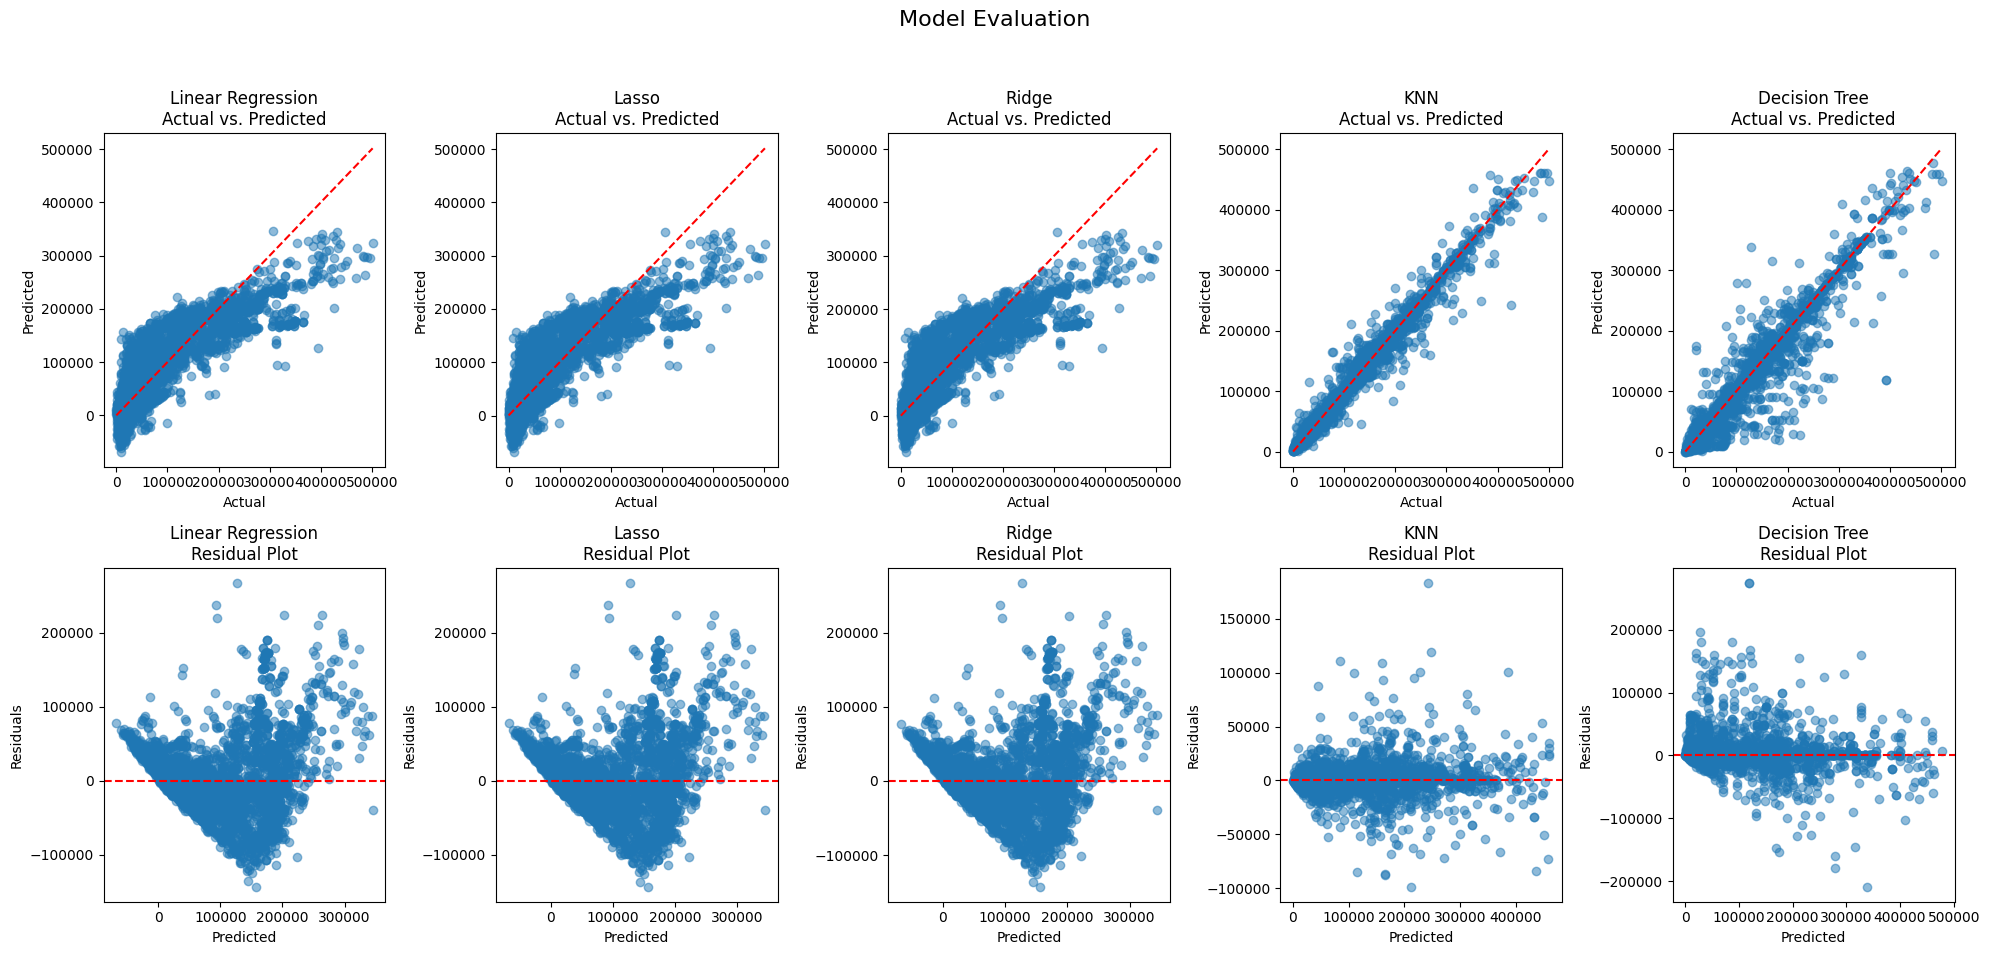

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your models and test data (x_test_dummy, y_test)
# lr, lss, rg, Knr, dtr are your trained models

# Get predictions for each model
y_pred_lr = lr.predict(x_test_dummy)
y_pred_lss = lss.predict(x_test_dummy)
y_pred_rg = rg.predict(x_test_dummy)
y_pred_Knr = Knr.predict(x_test_dummy)
y_pred_dtr = dtr.predict(x_test_dummy)

# Calculate evaluation metrics (MSE and R-squared)
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree']
model_predictions = [y_pred_lr, y_pred_lss, y_pred_rg, y_pred_Knr, y_pred_dtr]
mse_scores = []
r2_scores = []

for predictions in model_predictions:
    mse_scores.append(mean_squared_error(y_test, predictions))
    r2_scores.append(r2_score(y_test, predictions))

# Print evaluation metrics
for i in range(len(model_names)):
    print(f"{model_names[i]} - MSE: {mse_scores[i]:.4f}, R-squared: {r2_scores[i]:.4f}")

# Create visualizations (Actual vs. Predicted and Residual Plots)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Model Evaluation', fontsize=16)

for i, (name, predictions) in enumerate(zip(model_names, model_predictions)):
    # Actual vs. Predicted plot
    axes[0, i].scatter(y_test, predictions, alpha=0.5)
    axes[0, i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[0, i].set_title(f'{name}\nActual vs. Predicted')
    axes[0, i].set_xlabel('Actual')
    axes[0, i].set_ylabel('Predicted')

    # Residual plot
    residuals = y_test - predictions
    axes[1, i].scatter(predictions, residuals, alpha=0.5)
    axes[1, i].axhline(y=0, color='red', linestyle='--')
    axes[1, i].set_title(f'{name}\nResidual Plot')
    axes[1, i].set_xlabel('Predicted')
    axes[1, i].set_ylabel('Residuals')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for suptitle
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_scores = {
    'Linear Regression': r2_score(y_test, y_pred_lr),
    'Lasso': r2_score(y_test, y_pred_lss),
    'Ridge': r2_score(y_test, y_pred_rg),
    'KNN': r2_score(y_test, y_pred_Knr),
    'Decision Tree': r2_score(y_test, y_pred_dtr)
}

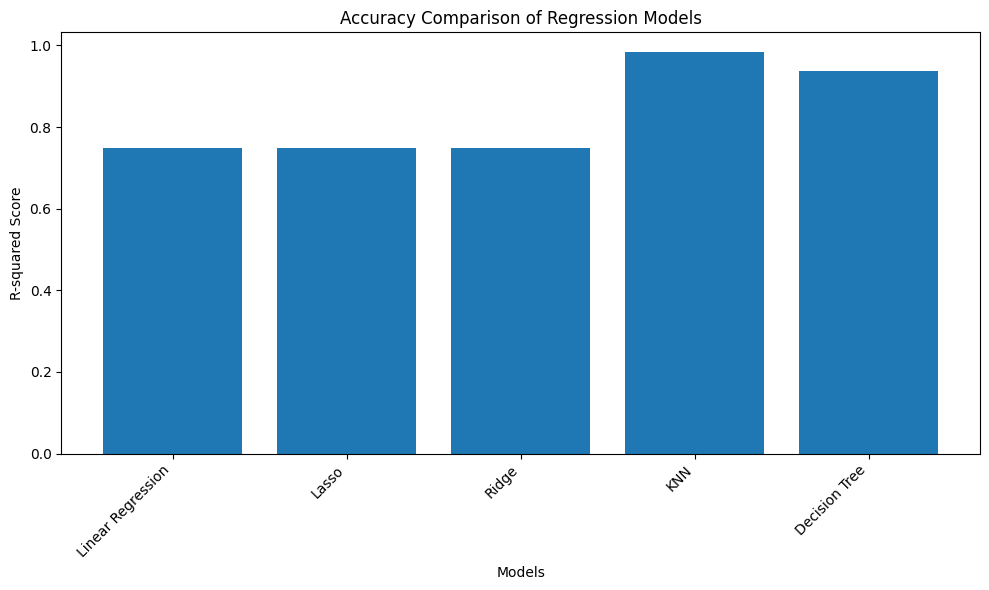

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values())
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Accuracy Comparison of Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()